In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import networkx as nx
import time
import random
import numpy as np
import pandas as pd
from random import randint
from multiprocessing.pool import Pool
from itertools import combinations
from psutil import Popen, TimeoutExpired
from networkx import Graph
from tempfile import NamedTemporaryFile
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

In [4]:
df = pd.read_csv('results.csv')

#splitting the data into exp 1 and exp 2
# Experiment 1: Adjacency Matrix and Priority Queue as Array
experiment_1 = df[(df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'array')]

# Experiment 2: Adjacency List and Priority Queue as Heap
experiment_2 = df[(df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap')]

In [11]:
# Grouping for Experiment 1
grouped_experiment_1 = experiment_1.groupby(['n_vertex', 'p_edge', 'graph_adj', 'priority_queue']).agg({
    'ram': 'mean', 
    'time': 'mean'
}).reset_index()

# Renaming columns to indicate they are averages
grouped_experiment_1.rename(columns={'ram': 'mean_ram', 'time': 'mean_time_taken'}, inplace=True)

# Display the results for Experiment 1
print("Final Grouped Data for Experiment 1 (Mean RAM and Mean Time Taken):")
print(grouped_experiment_1)

Final Grouped Data for Experiment 1 (Mean RAM and Mean Time Taken):
     n_vertex    p_edge graph_adj priority_queue      mean_ram  \
0           1  0.000000    matrix          array  1.425203e+07   
1           1  0.052632    matrix          array  1.473331e+07   
2           1  0.105263    matrix          array  1.474150e+07   
3           1  0.157895    matrix          array  1.474150e+07   
4           1  0.210526    matrix          array  1.474423e+07   
..        ...       ...       ...            ...           ...   
415      1000  0.789474    matrix          array  4.081254e+07   
416      1000  0.842105    matrix          array  4.144742e+07   
417      1000  0.894737    matrix          array  4.179176e+07   
418      1000  0.947368    matrix          array  4.270899e+07   
419      1000  1.000000    matrix          array  4.333568e+07   

     mean_time_taken  
0           6.064810  
1           5.610430  
2           7.223399  
3           7.087736  
4           5.961244  
.

In [12]:
# Grouping for Experiment 2
grouped_experiment_2 = experiment_2.groupby(['n_vertex', 'p_edge', 'graph_adj', 'priority_queue']).agg({
    'ram': 'mean', 
    'time': 'mean'
}).reset_index()

# Renaming columns to indicate they are averages
grouped_experiment_2.rename(columns={'ram': 'mean_ram', 'time': 'mean_time_taken'}, inplace=True)

# Display the results for Experiment 2
print("\nFinal Grouped Data for Experiment 2 (Mean RAM and Mean Time Taken):")
print(grouped_experiment_2)


Final Grouped Data for Experiment 2 (Mean RAM and Mean Time Taken):
     n_vertex    p_edge graph_adj priority_queue      mean_ram  \
0           1  0.000000      list           heap  1.473604e+07   
1           1  0.052632      list           heap  1.474970e+07   
2           1  0.105263      list           heap  1.473877e+07   
3           1  0.157895      list           heap  1.475243e+07   
4           1  0.210526      list           heap  1.474697e+07   
..        ...       ...       ...            ...           ...   
415      1000  0.789474      list           heap  5.038080e+07   
416      1000  0.842105      list           heap  5.057099e+07   
417      1000  0.894737      list           heap  5.145259e+07   
418      1000  0.947368      list           heap  5.222810e+07   
419      1000  1.000000      list           heap  5.181030e+07   

     mean_time_taken  
0           7.129046  
1           7.581333  
2           7.665111  
3           5.767951  
4           8.917935  


# plotting the graphs

### Experiment 1: fixing the value of edges, then plotting the graph by varying the values of V and seeing its changes on the CPU_run time

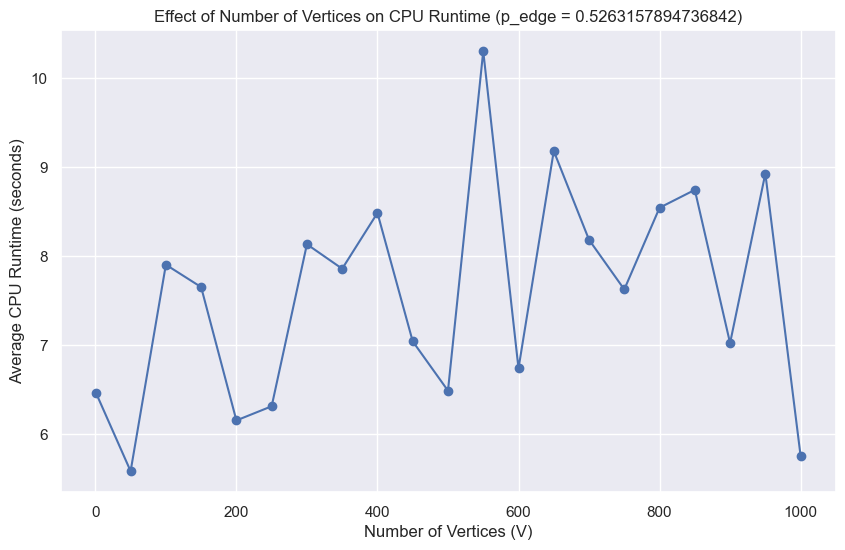

In [14]:
# Fix the value of p_edge (you can change this value)
fixed_p_edge = 0.5263157894736842   

# Filter the grouped_experiment_1 DataFrame for the fixed p_edge
filtered_data = grouped_experiment_1[grouped_experiment_1['p_edge'] == fixed_p_edge]

# Plot n_vertex vs mean_time_taken
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['n_vertex'], filtered_data['mean_time_taken'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Vertices (V)')
plt.ylabel('Average CPU Runtime (seconds)')
plt.title(f'Effect of Number of Vertices on CPU Runtime (p_edge = {fixed_p_edge})')

# Show the grid for better visualization
plt.grid(True)

# Display the plot
plt.show()


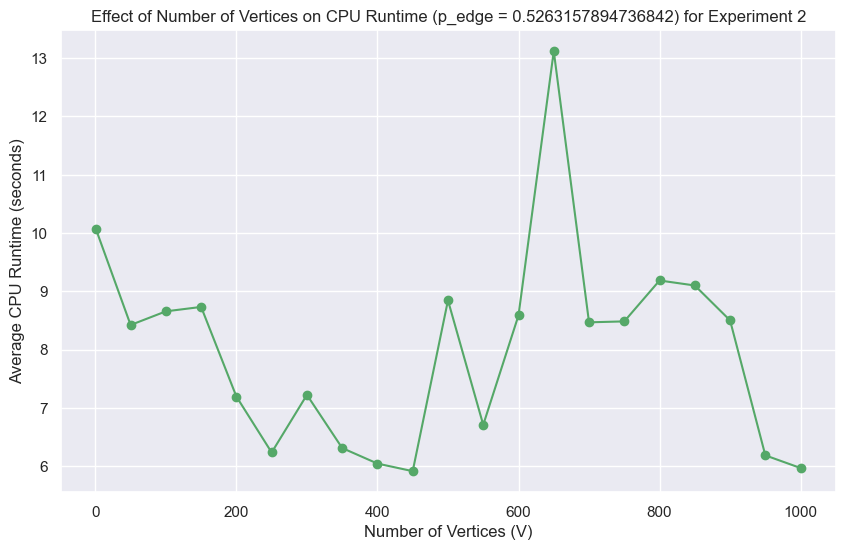

In [15]:
# Fix the value of p_edge (you can change this value)
fixed_p_edge_exp2 = 0.5263157894736842   # Example: fixing p_edge at 0.5 for Experiment 2

# Filter the grouped_experiment_2 DataFrame for the fixed p_edge
filtered_data_exp2 = grouped_experiment_2[grouped_experiment_2['p_edge'] == fixed_p_edge_exp2]

# Plot n_vertex vs mean_time_taken for Experiment 2
plt.figure(figsize=(10, 6))
plt.plot(filtered_data_exp2['n_vertex'], filtered_data_exp2['mean_time_taken'], marker='o', linestyle='-', color='g')

# Add labels and title
plt.xlabel('Number of Vertices (V)')
plt.ylabel('Average CPU Runtime (seconds)')
plt.title(f'Effect of Number of Vertices on CPU Runtime (p_edge = {fixed_p_edge_exp2}) for Experiment 2')

# Show the grid for better visualization
plt.grid(True)

# Display the plot
plt.show()


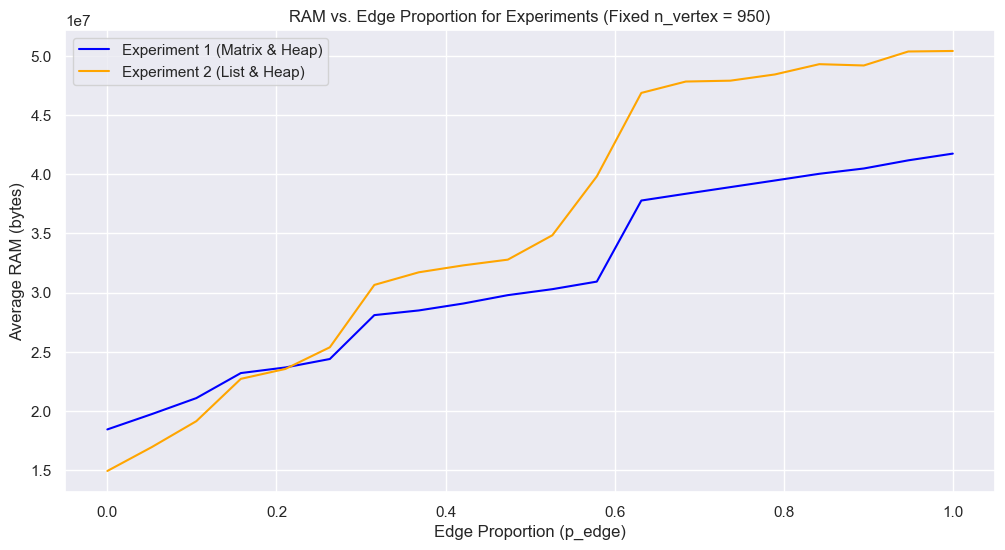

In [21]:
# Assuming grouped_experiment_1 and grouped_experiment_2 are already created from previous steps
# Fix the number of vertices (n_vertex)
fixed_n_vertex = 950  # Change this to the desired value

# Filter the grouped DataFrames for the fixed n_vertex
experiment_1_filtered = grouped_experiment_1[grouped_experiment_1['n_vertex'] == fixed_n_vertex]
experiment_2_filtered = grouped_experiment_2[grouped_experiment_2['n_vertex'] == fixed_n_vertex]

# Plotting the results for both experiments
plt.figure(figsize=(12, 6))

# Line plot for Experiment 1 (Adjacency Matrix and Heap)
sns.lineplot(data=experiment_1_filtered, x='p_edge', y='mean_ram', label='Experiment 1 (Matrix & Heap)', color='blue')

# Line plot for Experiment 2 (Adjacency List and Heap)
sns.lineplot(data=experiment_2_filtered, x='p_edge', y='mean_ram', label='Experiment 2 (List & Heap)', color='orange')

# Adding labels and title
plt.title(f'RAM vs. Edge Proportion for Experiments (Fixed n_vertex = {fixed_n_vertex})')
plt.xlabel('Edge Proportion (p_edge)')
plt.ylabel('Average RAM (bytes)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

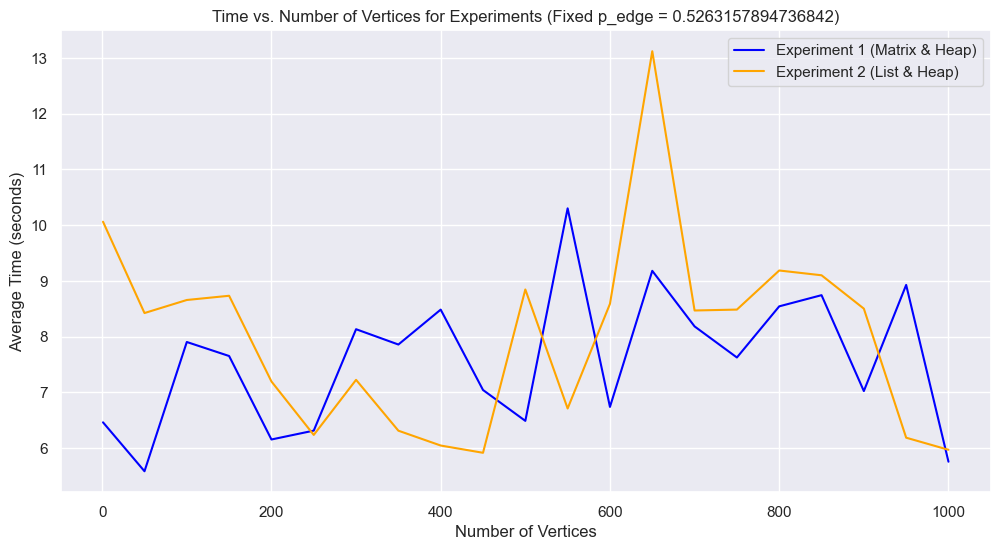

In [19]:
# Assuming grouped_experiment_1 and grouped_experiment_2 are already created from previous steps
# Fix the value of edges (p_edge)
fixed_p_edge = 0.5263157894736842  # Change this to the desired value

# Filter the grouped DataFrames for the fixed p_edge
experiment_1_filtered = grouped_experiment_1[grouped_experiment_1['p_edge'] == fixed_p_edge]
experiment_2_filtered = grouped_experiment_2[grouped_experiment_2['p_edge'] == fixed_p_edge]

# Plotting the results for both experiments
plt.figure(figsize=(12, 6))

# Line plot for Experiment 1 (Adjacency Matrix and Heap)
sns.lineplot(data=experiment_1_filtered, x='n_vertex', y='mean_time_taken', label='Experiment 1 (Matrix & Heap)', color='blue')

# Line plot for Experiment 2 (Adjacency List and Heap)
sns.lineplot(data=experiment_2_filtered, x='n_vertex', y='mean_time_taken', label='Experiment 2 (List & Heap)', color='orange')

# Adding labels and title
plt.title(f'Time vs. Number of Vertices for Experiments (Fixed p_edge = {fixed_p_edge})')
plt.xlabel('Number of Vertices')
plt.ylabel('Average Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


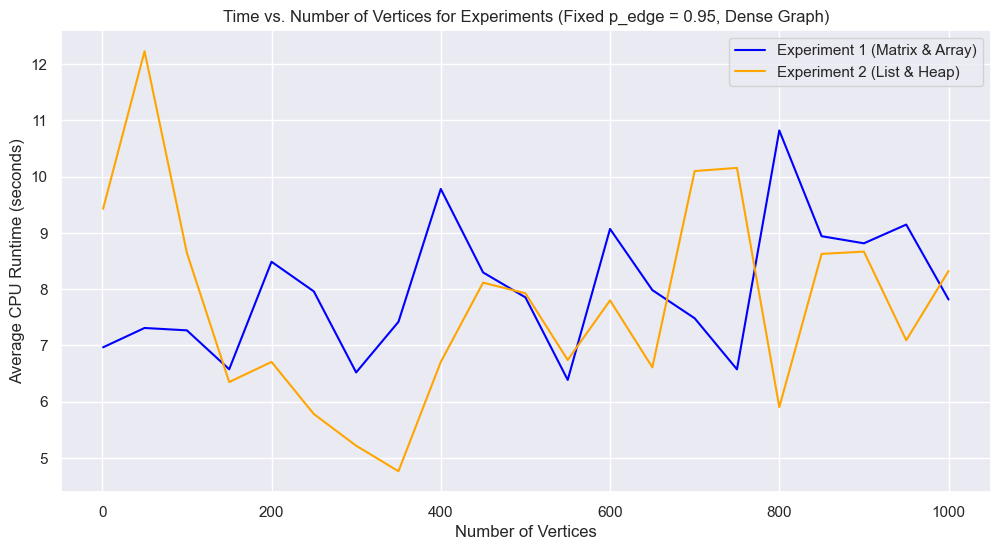

In [17]:
# Assuming grouped_experiment_1 and grouped_experiment_2 are already created from previous steps
# Fix the value of edges for a dense graph
fixed_p_edge = 0.95  # Adjust this for your dense graph scenario

# Filter the grouped DataFrames for the fixed p_edge
experiment_1_filtered = grouped_experiment_1[grouped_experiment_1['p_edge'].between(fixed_p_edge - 0.01, fixed_p_edge + 0.01)]
experiment_2_filtered = grouped_experiment_2[grouped_experiment_2['p_edge'].between(fixed_p_edge - 0.01, fixed_p_edge + 0.01)]

# Plotting the results for both experiments
plt.figure(figsize=(12, 6))

# Line plot for Experiment 1 (Adjacency Matrix and Array)
sns.lineplot(data=experiment_1_filtered, x='n_vertex', y='mean_time_taken', label='Experiment 1 (Matrix & Array)', color='blue')

# Line plot for Experiment 2 (Adjacency List and Heap)
sns.lineplot(data=experiment_2_filtered, x='n_vertex', y='mean_time_taken', label='Experiment 2 (List & Heap)', color='orange')

# Adding labels and title
plt.title(f'Time vs. Number of Vertices for Experiments (Fixed p_edge = {fixed_p_edge}, Dense Graph)')
plt.xlabel('Number of Vertices')
plt.ylabel('Average CPU Runtime (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

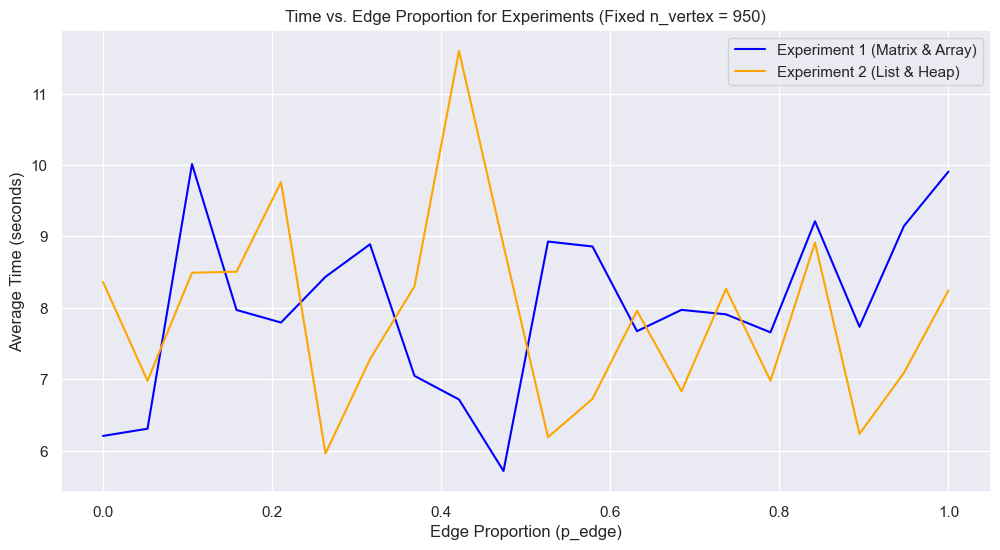

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming grouped_experiment_1 and grouped_experiment_2 are already created from previous steps
# Fix the number of vertices (n_vertex) to a large value
fixed_n_vertex = 950  # Fixed large number of vertices

# Filter the grouped DataFrames for the fixed n_vertex
experiment_1_filtered = grouped_experiment_1[grouped_experiment_1['n_vertex'] == fixed_n_vertex]
experiment_2_filtered = grouped_experiment_2[grouped_experiment_2['n_vertex'] == fixed_n_vertex]

# Plotting the results for both experiments
plt.figure(figsize=(12, 6))

# Line plot for Experiment 1 (Adjacency Matrix and Array)
sns.lineplot(data=experiment_1_filtered, x='p_edge', y='mean_time_taken', label='Experiment 1 (Matrix & Array)', color='blue')

# Line plot for Experiment 2 (Adjacency List and Heap)
sns.lineplot(data=experiment_2_filtered, x='p_edge', y='mean_time_taken', label='Experiment 2 (List & Heap)', color='orange')

# Adding labels and title
plt.title(f'Time vs. Edge Proportion for Experiments (Fixed n_vertex = {fixed_n_vertex})')
plt.xlabel('Edge Proportion (p_edge)')
plt.ylabel('Average Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
